# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

#Saving the merged DataFrame for deliverable 2
#Reference code used from https://stackoverflow.com/questions/49608656/saving-a-dataframe-to-csv-file-python
pyber_data_df.to_csv("merged_dataframe.csv")

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [3]:
#  1. Get the total rides for each city type

all_rides_count = pyber_data_df.groupby(["type"]).count()["ride_id"]
all_rides_count

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [4]:
# 2. Get the total drivers for each city type

all_drivers_count = pyber_data_df.groupby(["type"]).sum()["driver_count"]
all_drivers_count

type
Rural         537
Suburban     8570
Urban       59602
Name: driver_count, dtype: int64

In [5]:
#  3. Get the total amount of fares for each city type

all_fares_count = pyber_data_df.groupby(["type"]).sum()["fare"]
all_fares_count

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [6]:
#  4. Get the average fare per ride for each city type. 
#Could not figure out how to use the devisable so I used the mean function

all_avg_fare = pyber_data_df.groupby(["type"]).mean()["fare"]
all_avg_fare

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
Name: fare, dtype: float64

In [7]:
# 5. Get the average fare per driver for each city type. 

all_avg_driver = pyber_data_df.groupby(["type"]).mean()["driver_count"]
all_avg_driver

type
Rural        4.296000
Suburban    13.712000
Urban       36.678154
Name: driver_count, dtype: float64

In [8]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.DataFrame(
          {"Total Rides": all_rides_count,
          "Total Drivers": all_drivers_count,
          "Total Fares": all_fares_count,
          "Average Fare per Ride": all_avg_fare,
          "Average Fare per Driver": all_avg_driver})
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,537,4327.93,34.623440,4.296000
Suburban,625,8570,19356.33,30.970128,13.712000
Urban,1625,59602,39854.38,24.525772,36.678154


In [9]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = type

pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
<class 'type'>,,,,,
Rural,125,537,4327.93,34.623440,4.296000
Suburban,625,8570,19356.33,30.970128,13.712000
Urban,1625,59602,39854.38,24.525772,36.678154


In [10]:
#  8. Format the columns.
pyber_summary_df = pd.DataFrame(
          {"Total Rides": all_rides_count.map("{:,}".format),
          "Total Drivers": all_drivers_count.map("{:,}".format),
          "Total Fares": all_fares_count.map("${:,.2f}".format),
          "Average Fare per Ride": all_avg_fare.map("${:,.2f}".format),
          "Average Fare per Driver": all_avg_driver.map("${:,.2f}".format)})
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,537,"$4,327.93",$34.62,$4.30
Suburban,625,"8,570","$19,356.33",$30.97,$13.71
Urban,"1,625","59,602","$39,854.38",$24.53,$36.68


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [11]:
# 1. Read the merged DataFrame

# File to Load (Remember to change these)
merged_df_to_load = "merged_dataframe.csv"

# Read the merged dataframe
merged_df = pd.read_csv(merged_df_to_load)

merged_df.head()

,Unnamed: 0,city,date,fare,ride_id,driver_count,type
0,0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [12]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.

sum_of_fares = merged_df.groupby(["type", "date"]).sum()["fare"]

type(sum_of_fares)

pandas.core.series.Series

In [13]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.

sum_of_fares_df = sum_of_fares.reset_index()

sum_of_fares_df


,type,date,fare
0,Rural,2019-01-01 09:45:36,43.69
1,Rural,2019-01-02 11:18:32,52.12
2,Rural,2019-01-03 19:51:01,19.90
3,Rural,2019-01-04 03:31:26,24.88
4,Rural,2019-01-06 07:38:40,47.33
...,...,...,...
2370,Urban,2019-05-08 04:20:00,21.99
2371,Urban,2019-05-08 04:39:49,18.45
2372,Urban,2019-05-08 07:29:01,18.55
2373,Urban,2019-05-08 11:38:35,19.77


In [14]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
#documentation on how to make pivot table https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot.html

sum_pivot_df = sum_of_fares_df.pivot(index="date", columns="type", values="fare")

sum_pivot_df

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [15]:
type(sum_pivot_df)

pandas.core.frame.DataFrame

In [16]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.

sum_df = sum_pivot_df.reset_index()

sum_df = sum_df.loc[(sum_df["date"]>="2019-01-01")&(sum_df["date"]<="2019-04-29")]

In [17]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
sum_df.index = pd.to_datetime(sum_df["date"])
sum_df

type,date,Rural,Suburban,Urban
date,,,,
2019-01-01 00:08:16,2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...,...
2019-04-28 14:28:36,2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,2019-04-28 17:26:52,NaN,NaN,31.43


In [18]:
# 7. Check that the datatype for the index is datetime using df.info()
sum_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      2196 non-null   object 
 1   Rural     114 non-null    float64
 2   Suburban  573 non-null    float64
 3   Urban     1509 non-null   float64
dtypes: float64(3), object(1)
memory usage: 85.8+ KB


In [19]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
sum_df_by_week = sum_df.resample('W').sum()

sum_df_by_week

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


In [20]:
#Setting x and y axis for the follwoing graph
x_axis = ['date']
y_axis = ['type']

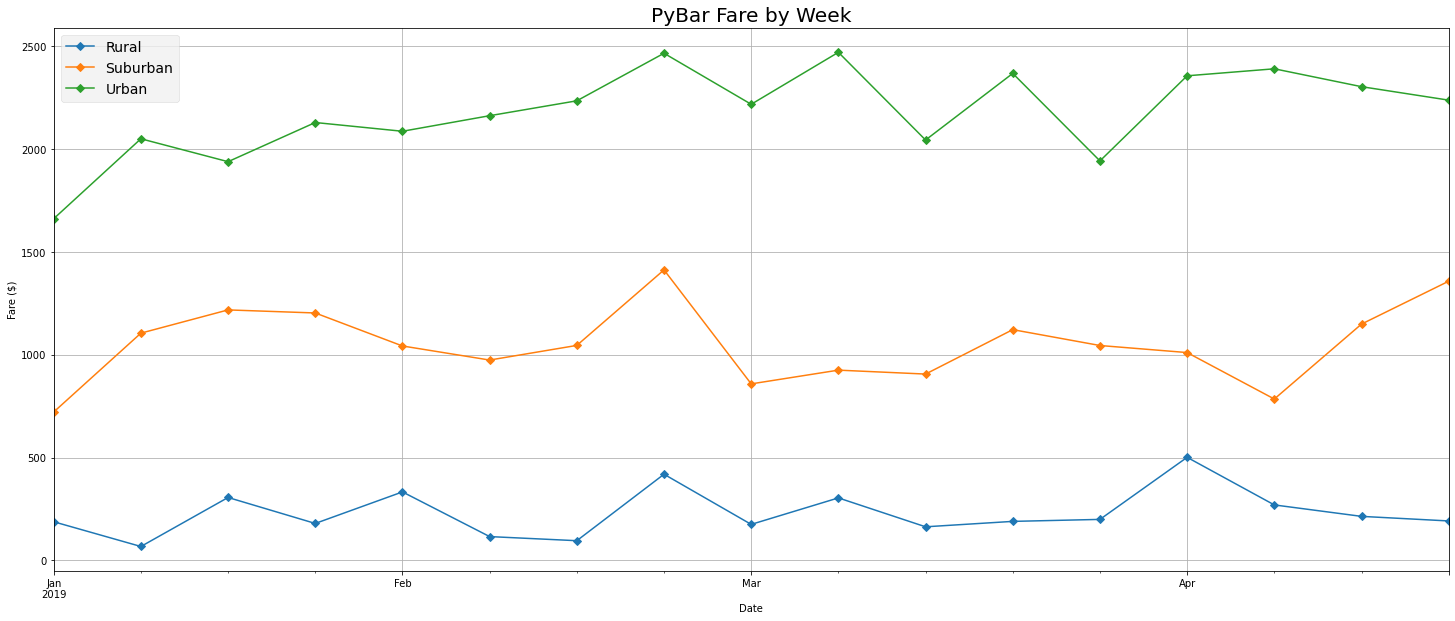

In [21]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
# Import the style from Matplotlib.
from matplotlib import style

fig = sum_df_by_week.plot(figsize=(25,10), marker="D", label='City Type')

# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')
fig.legend()
fig.set_title("PyBar Fare by Week")
fig.set_ylabel('Fare ($)')
fig.set_xlabel('Date')
fig.grid()
fig.figure.savefig("PyBer_Fare_By_Week.png")